#  k - Nearest Neighbor Rule

Para esta implementación sencilla, utilizaremos el data set de "Iris" de la fuente [UCI Machine Learning](https://archive.ics.uci.edu/dataset/53/iris)


### Accedemos a las información

Recordemos que:

- features: corresponden a las caracterísiticas o valores de las columnas
- Target: a la clase o etiqueta por cada fila

In [25]:
import pandas as pd

df = pd.read_csv('iris/iris.data', header=None)

# Mostramos las columnas del DataFrame
print(df.columns)

# Asignamos nombres a las columnas
df.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "class"
]

# Mostramos las primeras filas del DataFrame y la información general
print(df.head())
print()
print(df.info())

Index([0, 1, 2, 3, 4], dtype='int64')
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB
None


## Graficamos petal_length vs petal_width


In [ ]:
import matplotlib.pyplot as plt

# Separar por clase
setosa = df[df["class"] == "Iris-setosa"]
versicolor = df[df["class"] == "Iris-versicolor"]
virginica = df[df["class"] == "Iris-virginica"]

# Graficar
plt.figure()

# Scatter plot de petal_length vs petal_width para cada clase
plt.scatter(setosa["petal_length"], setosa["petal_width"])
plt.scatter(versicolor["petal_length"], versicolor["petal_width"])
plt.scatter(virginica["petal_length"], virginica["petal_width"])

# Etiquetas y título
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Petal Comparison")
plt.legend(["Setosa", "Versicolor", "Virginica"])

# Mostrar la gráfica
plt.show()

## Implementación

La idea de k-NN, es comparar la distancia entre cada uno de los registros con la entrada `t` y guardar los `k` registros más cercanos a `t`. La clase que tenga el mayor número de vecinos dentro de los `k` vecinos encontrados, determina la clase del nuevo elemento.

Con esta idea en mente, se implementaría un `k-NN` con lazy learning

In [59]:
from math import sqrt
from typing import Optional
from numpy import array


def euclidean_distance(pointA: array, pointB: array) -> float:
    """
    Calculate the euclidena distnace between A and B
    """
    res = 0
    for i in range(len(pointA) - 1):
        res += (pointB[i] - pointA[i])**2
    return sqrt(res)

def sort_kNeighbors(kNeibors: list, new_class: str, new_distance: float, k: int) -> None:
    """
    Will update the deque to keep sort it with the following format
    [[new_value, new_distance], ..., [k-new_value, k-new_distance]]
    """
    new_dist = (new_distance, new_class)
    kNeibors.append(new_dist)
    kNeibors.sort() # O(m log m)
    if len(kNeibors) > k:
        while len(kNeibors) > k:
            kNeibors.pop()

def kNN_algorithm(k: int, new_value: list) -> tuple[int, Optional[str]]:
    """
    Gets the classification of the new_value by comparing the euclidean distance, and
    determine its classification based on k elements that are near the new_value
    """
    # k Neighbors - Queue
    kNeighbors = []

    dataset: array = df.iloc[:,:].values # [sepal_length, sepal_width, petal_length, petal_width, class] - Numpy array

    for i, row in enumerate(dataset):
        curr_distance: float = euclidean_distance(row, new_value)
        sort_kNeighbors(kNeighbors, row[-1], curr_distance, k)
    
    # We assume that kNeighbors (deque) has at the top the lowest distance and at the bottom the
    # greatest distance
    # All Neighbors will vote
    votes: dict = {
        "Iris-setosa": 0, 
        "Iris-versicolor": 0, 
        "Iris-virginica": 0
    }

    max_curr = (0, None)
    for elem in kNeighbors:
        if elem[1] == "Iris-setosa":
            votes["Iris-setosa"] += 1
            if max_curr[0] <= votes["Iris-setosa"]:
                max_curr = (votes["Iris-setosa"], "Iris-setosa")
        elif elem[1] == "Iris-versicolor":
            votes["Iris-versicolor"] += 1
            if max_curr[0] <= votes["Iris-versicolor"]:
                max_curr = (votes["Iris-versicolor"], "Iris-versicolor")
        elif elem[1] == "Iris-virginica":
            votes["Iris-virginica"] += 1
            if max_curr[0] <= votes["Iris-virginica"]:
                max_curr = (votes["Iris-virginica"], "Iris-virginica")
        else:
            raise ValueError(f"Class {elem[1][-1]} has not been defined")
    
    print(votes)
    return max_curr

# Setosa
example = [5.0, 3.6, 1.4, 0.2, None]
k = 3
print(kNN_algorithm(k, example))



{'Iris-setosa': 3, 'Iris-versicolor': 0, 'Iris-virginica': 0}
(3, 'Iris-setosa')


## Graficamos el resultado dentro de la grafica

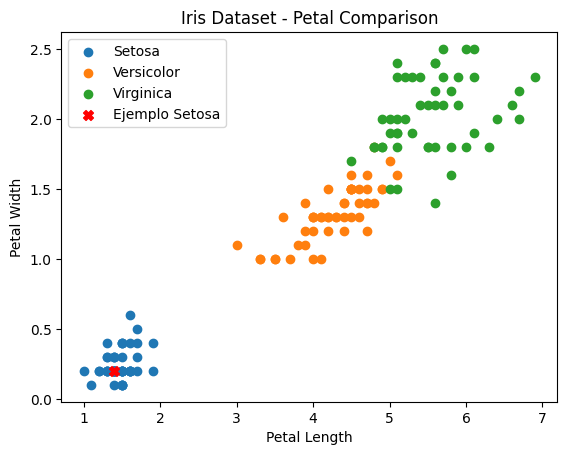

In [62]:
import matplotlib.pyplot as plt

# Separar por clase
setosa = df[df["class"] == "Iris-setosa"]
versicolor = df[df["class"] == "Iris-versicolor"]
virginica = df[df["class"] == "Iris-virginica"]

# Graficar
plt.figure()

# Scatter plot de petal_length vs petal_width para cada clase
plt.scatter(setosa["petal_length"], setosa["petal_width"])
plt.scatter(versicolor["petal_length"], versicolor["petal_width"])
plt.scatter(virginica["petal_length"], virginica["petal_width"])

# Graficamos el nuevo ejemplo
plt.scatter(example[2], example[3], color='red', marker='X', s=50, label='Ejemplo Setosa')

# Etiquetas y título
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Petal Comparison")
plt.legend(["Setosa", "Versicolor", "Virginica", "Ejemplo Setosa"])

# Mostrar la gráfica
plt.show()